In [1]:
import nbimporter
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from kaggle_dataset import read

Importing Jupyter notebook from kaggle_dataset.ipynb


In [2]:
# INFO: READ DATASET
# -- leitura dos dados originais

In [3]:
dataframe_credit_card_fraud = read("dataset/creditcard.csv")

In [4]:
# INFO: DATA TYPES
# -- verificando se é preciso codificar algum atributo (nominal)

In [5]:
dataframe_credit_card_fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# INFO: NUMBER OF ROWS
# -- saber o tamanho do dataset para analisar se tem valores faltantes nos atributos

In [7]:
len(dataframe_credit_card_fraud)

284807

In [8]:
# INFO: CHECKING EMPTY FIELDS
# -- substituindo valores faltantes por np.nan para remover do dataframe 
# -- e saber se o número de registros é menor que o original

In [9]:
len(dataframe_credit_card_fraud.replace(r'^\s*$', np.nan, regex=True).dropna())

284807

In [10]:
# INFO: SCALE OF VALUES
# -- verificando atributos em escalas diferentes (Time e Amount)

In [11]:
dataframe_credit_card_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# INFO: UNDERSTANDING DATA
# -- verificando a distribuição das classes (TOTALMENTE desbalanceado)

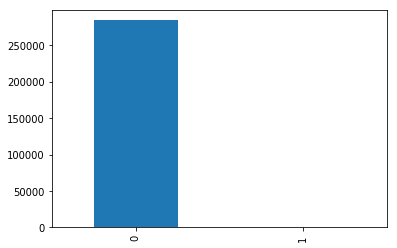

In [13]:
dataframe_credit_card_fraud["Class"].value_counts().plot.bar()

In [14]:
# -- função para plotar gráficos

In [15]:
def plot_graphic(x, y, x_label, y_label):
    plt.plot(x, y, color='tab:blue')
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [16]:
# INFO: PLOT AMOUNT X TIME
# -- verificando os atributos de escala maiores para normalizar

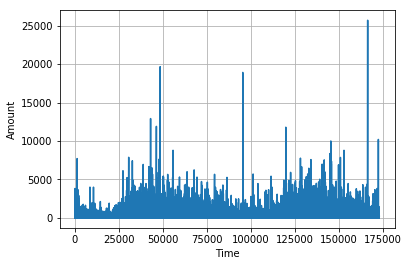

In [17]:
column_x = "Time"
column_y = "Amount"
plot_graphic(dataframe_credit_card_fraud[column_x], dataframe_credit_card_fraud[column_y], column_x, column_y)

In [18]:
# INFO: PLOT TIME
# -- verificando a quantidade de transações ao longo do tempo (segundos)
# -- as partes com menor frequencia parecem ser a mudanca de dia (periodo da noite)

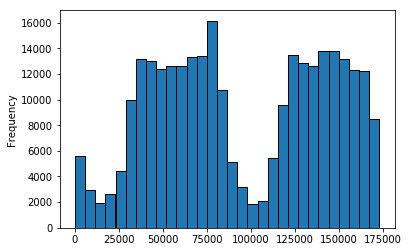

In [19]:
dataframe_credit_card_fraud["Time"].plot.hist(bins=30, edgecolor='black')

In [20]:
# INFO: PLOT CLASS X TIME
# -- verificando os segundos que aparecem classes positivas

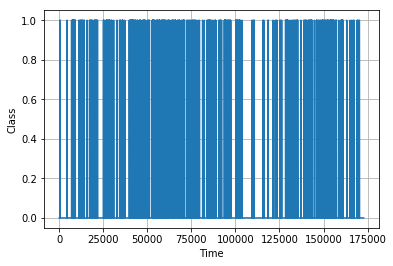

In [21]:
column_x = "Time"
column_y = "Class"
plot_graphic(dataframe_credit_card_fraud[column_x], dataframe_credit_card_fraud[column_y], column_x, column_y)

In [22]:
# -- função para pegar apenas os registros com classe positiva

In [23]:
def get_class_positive(dataframe_credit_card_fraud):
    return dataframe_credit_card_fraud.loc[dataframe_credit_card_fraud["Class"] == 1]

In [24]:
# INFO: PLOT CLASS POSITIVE X TIME
# -- verificando os segundos que aparecem classes positivas 

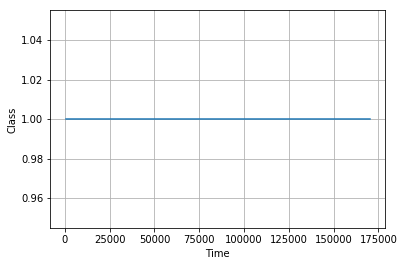

In [25]:
column_x = "Time"
column_y = "Class"
dataframe_class_positive = get_class_positive(dataframe_credit_card_fraud)
plot_graphic(dataframe_class_positive[column_x], dataframe_class_positive[column_y], column_x, column_y)

In [26]:
# INFO: PLOT TIME
# -- verificando a quantidade de transações ao longo do tempo (segundos) para as classes positivas

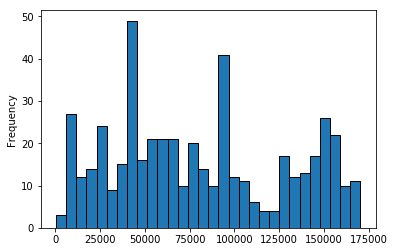

In [27]:
dataframe_class_positive["Time"].plot.hist(bins=30, edgecolor='black')

In [28]:
# -- função para ajustar o desbalanceamento
# -- seleciona aleatoriamente N registros da classe negativa onde N é igual ao número de regitros da classe positiva
# -- e junta esses registros com os da classe positiva

In [29]:
def adjusts_the_unbalance(lenght_dataframe_class_positive, dataframe_class_positive, dataframe_credit_card_fraud):
    dataframe_class_false = dataframe_credit_card_fraud.loc[dataframe_credit_card_fraud["Class"] == 0]
    return pd.concat([dataframe_class_false.sample(n=lenght_dataframe_class_positive), dataframe_class_positive])

In [30]:
# -- função para saber a quantidade de registros da classe positiva

In [31]:
def get_lenght_class_positive(dataframe_class_positive):
    return len(dataframe_class_positive)

In [32]:
# -- verificando a distribuição das classes com o ajuste do desbalanceamento
# -- salva o dataframe no formato csv como um novo dataset (controle)

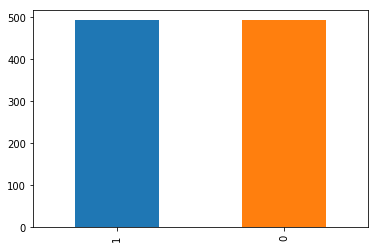

In [33]:
lenght_class_positive = get_lenght_class_positive(dataframe_class_positive)
dataframe_balanced = adjusts_the_unbalance(lenght_class_positive, dataframe_class_positive, dataframe_credit_card_fraud)
dataframe_balanced["Class"].value_counts().plot.bar()

if not os.path.exists("dataset/"):
            os.makedirs("dataset/")

dataframe_balanced.to_csv("dataset/creditcard_balanced.csv", sep=',', encoding='utf-8')

In [34]:
# -- função para normalizar os atributos de Time e Amount
# -- usa o metodo min-max

In [35]:
def normalize_dataframe(dataframe_balanced):
    cols_to_norm = ["Time", "Amount"]
    dataframe_balanced[cols_to_norm] = dataframe_balanced[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return dataframe_balanced

In [36]:
# -- faz a normalização de Time e Amount e salva o csv do dataframe como um novo dataset

In [37]:
normalize = normalize_dataframe(dataframe_balanced)
normalize.to_csv("dataset/creditcard_balanced_normalize.csv", sep=',', encoding='utf-8')
normalize.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91761,0.368227,1.151791,0.444235,0.889697,2.739001,-0.287967,-0.122166,-0.003544,-0.052210,-0.308133,...,-0.069806,0.020114,-0.091444,0.426518,0.649987,0.074775,0.012797,0.022512,0.003019,0
136171,0.472857,-2.142194,1.907115,0.474964,0.691057,-0.317735,-0.790707,0.596432,-0.278326,0.430699,...,0.168777,0.439063,-0.039139,0.381695,-0.260055,-0.457767,-1.090118,0.033346,0.008663,0
238899,0.870700,-0.628600,1.280988,-0.613239,-1.207369,1.137296,0.436471,0.488649,-0.615474,0.241708,...,0.418832,-1.016633,0.099266,-0.446080,-0.256866,0.175452,0.484699,0.217459,0.001140,0
22130,0.184350,-0.713494,0.833178,1.657969,-0.197593,0.089400,-0.282993,0.578605,0.086452,-0.090667,...,-0.235644,-0.458373,0.015983,0.159812,-0.349836,0.052743,0.213673,-0.049285,0.003571,0
181661,0.726219,-0.524431,0.176976,0.913039,-2.375649,-0.068577,0.409356,1.218850,-1.662132,0.787612,...,0.281185,1.395203,-0.436217,-0.931392,-0.531630,-0.360258,-2.145960,-1.069017,0.042540,0
